In [252]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats as st
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline

In [253]:
from google.colab import drive #toimport google drive data

In [254]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [255]:
cd /content/drive/"My Drive/ML-Project"

/content/drive/My Drive/ML-Project


In [256]:
masterData = pd.read_csv('Backorder.csv')
masterData

,product_id,current_inventory,transit_duration,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_performance_6_months,source_performance_12_months,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,No,0.84,0.83,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,No,0.99,0.99,No,No,No,Yes,No,No
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,No,0.84,0.83,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,1.0,No,0.10,0.13,No,No,No,Yes,No,No
4,1044048,8.0,8.0,0.0,0.0,0.0,4.0,2.0,No,0.84,0.83,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,1407754,0.0,2.0,0.0,5.0,7.0,7.0,0.0,No,0.69,0.69,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,8.0,1.0,3.0,3.0,8.0,0.0,No,0.84,0.83,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,8.0,11.0,12.0,0.0,No,0.86,0.84,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,35.0,63.0,153.0,205.0,12.0,No,0.86,0.84,No,No,No,Yes,No,No


In [257]:
masterData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687860 entries, 0 to 1687859
Data columns (total 17 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   product_id                    1687860 non-null  int64  
 1   current_inventory             1687860 non-null  float64
 2   transit_duration              1687860 non-null  float64
 3   prior_sales_1_month           1687860 non-null  float64
 4   prior_sales_3_month           1687860 non-null  float64
 5   prior_sales_6_month           1687860 non-null  float64
 6   prior_sales_9_month           1687860 non-null  float64
 7   minimum_recommend_stock       1687860 non-null  float64
 8   source_has_issue              1687860 non-null  object 
 9   source_performance_6_months   1687860 non-null  float64
 10  source_performance_12_months  1687860 non-null  float64
 11  deck_risk                     1687860 non-null  object 
 12  oe_constraint               

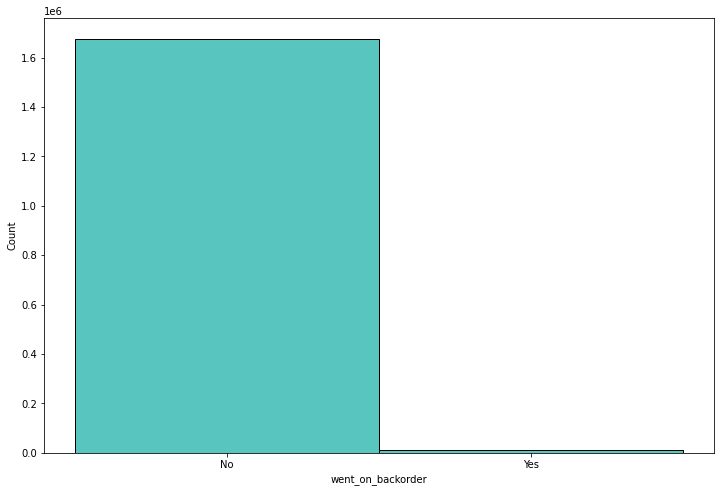

In [258]:
plt.figure(figsize=(12,8))
ax=sns.histplot(data=masterData,x='went_on_backorder',color='lightseagreen')
ax.figure.savefig('Mean.png', dpi=500,bbox_inches='tight')

In [259]:
masterData['went_on_backorder'].value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

In [260]:
join1=masterData[masterData['went_on_backorder']=='Yes']
join2=masterData[masterData['went_on_backorder']=='No']
join3=join2.sample(n=11000, random_state = 42)

masterData=pd.merge(join1,join3,how='outer')
masterData=masterData.sample(frac=1).reset_index(drop=True)
masterData

,product_id,current_inventory,transit_duration,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_performance_6_months,source_performance_12_months,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2105255,2.0,8.0,0.0,0.0,0.0,2.0,0.0,No,0.99,0.99,No,No,No,Yes,No,No
1,1223360,0.0,2.0,22.0,22.0,22.0,22.0,0.0,No,0.98,0.98,No,No,No,Yes,No,Yes
2,1827068,0.0,8.0,2.0,2.0,3.0,5.0,0.0,No,0.00,0.00,No,No,No,Yes,No,Yes
3,1909731,8.0,2.0,8.0,22.0,32.0,33.0,2.0,No,0.84,0.84,No,No,No,Yes,No,Yes
4,1609924,1.0,8.0,0.0,3.0,3.0,3.0,0.0,No,0.42,0.36,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22288,1665853,4.0,2.0,12.0,22.0,41.0,69.0,18.0,No,0.09,0.37,No,No,No,Yes,No,Yes
22289,1361310,0.0,2.0,0.0,0.0,0.0,0.0,1.0,No,0.84,0.83,No,No,Yes,Yes,No,No
22290,1314315,6.0,8.0,4.0,12.0,19.0,35.0,1.0,No,0.98,0.99,No,No,No,Yes,No,Yes
22291,1268112,2.0,12.0,0.0,0.0,0.0,0.0,0.0,No,0.62,0.73,No,No,No,Yes,No,No


In [261]:
#Preparing the data for modeling
#X = pd.DataFrame(masterData.columns)
X = masterData[masterData.columns]
y = masterData['went_on_backorder']
X.shape, y.shape

((22293, 17), (22293,))

In [262]:
#Convert the categorical data into numerical
y = y.replace('Yes', 1)
y = y.replace('No', 0)
X['source_has_issue'] = X.source_has_issue.map({'Yes':1, 'No':0})
X['deck_risk'] = X.deck_risk.map({'Yes':1, 'No':0})
X['oe_constraint'] = X.oe_constraint.map({'Yes':1, 'No':0})
X['ppap_risk'] = X.ppap_risk.map({'Yes':1, 'No':0})
X['stop_auto_buy'] = X.stop_auto_buy.map({'Yes':1, 'No':0})
X['rev_stop'] = X.rev_stop.map({'Yes':1, 'No':0})
X = X.drop(['went_on_backorder', 'source_has_issue', 'rev_stop', 'deck_risk', 'ppap_risk', 'stop_auto_buy','product_id'], axis = 1, errors = 'ignore')
X.shape, y.shape

((22293, 10), (22293,))

In [263]:

X_sample, X_data, y_sample, y_data = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_sample.shape, y_sample.shape, X_data.shape, y_data.shape

((16719, 10), (16719,), (5574, 10), (5574,))

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11703, 10), (5016, 10), (11703,), (5016,))

In [265]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_jobs = -1))]
#Create the pipeline: pipeline
pipeline_knn = Pipeline(steps)

# Fit to the training set
pipeline_knn.fit(X_train, y_train)
knn_prediction = pipeline_knn.predict( X_test )
# get the classification report
knn_report = classification_report( y_test, knn_prediction )
print(knn_report)

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      2489
           1       0.73      0.78      0.75      2527

    accuracy                           0.74      5016
   macro avg       0.74      0.74      0.74      5016
weighted avg       0.74      0.74      0.74      5016



In [266]:

rfmodel = RandomForestClassifier(random_state = 42)
#Fit the training set
rfmodel.fit(X_train, y_train)
rfmodel_prediction = rfmodel.predict(X_test)
#get the classification report
rfmodel_report =  classification_report(y_test, rfmodel_prediction)
print(rfmodel_report)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2489
           1       0.88      0.91      0.90      2527

    accuracy                           0.89      5016
   macro avg       0.89      0.89      0.89      5016
weighted avg       0.89      0.89      0.89      5016



In [267]:
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(class_weight = 'balanced'))]
#Create the pipeline: pipeline
pipeline_logreg = Pipeline(steps)

# Fit to the training set
pipeline_logreg.fit(X_train, y_train)
logreg_prediction = pipeline_logreg.predict( X_test )
# get the classification report
logreg_report = classification_report( y_test, logreg_prediction )
print(logreg_report)

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      2489
           1       0.63      0.65      0.64      2527

    accuracy                           0.64      5016
   macro avg       0.64      0.64      0.64      5016
weighted avg       0.64      0.64      0.64      5016



In [268]:
from sklearn.ensemble import GradientBoostingClassifier

gbmodel = GradientBoostingClassifier(random_state = 42)
gbmodel.fit(X_train, y_train)
gbmodel_prediction = gbmodel.predict(X_test)
#get the classification report
gbmodel_report =  classification_report(y_test, gbmodel_prediction)
print(gbmodel_report)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2489
           1       0.86      0.87      0.86      2527

    accuracy                           0.86      5016
   macro avg       0.86      0.86      0.86      5016
weighted avg       0.86      0.86      0.86      5016



Text(0.5, 1.0, 'ROC Curve')

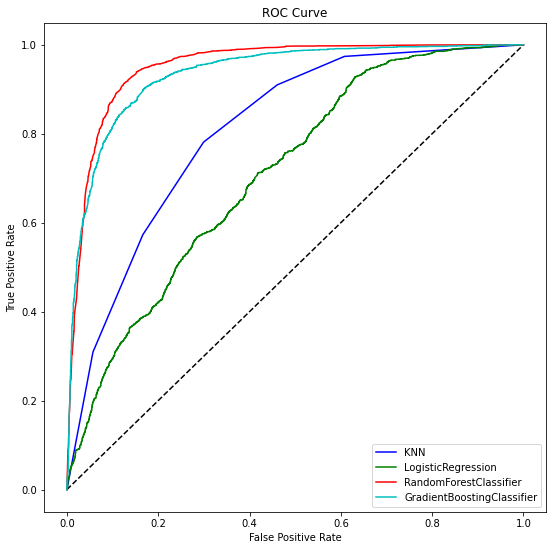

In [269]:
#plot ROC Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
plt.plot([0, 1], [0, 1], 'k--')
estimators =[pipeline_knn, pipeline_logreg, rfmodel,gbmodel]
classifiers=['KNN', 'LogisticRegression', 'RandomForestClassifier','GradientBoostingClassifier'
           ]
colors = ['b', 'g', 'r','c']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=classifiers[i],color=colors[i]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve')

Text(0.5, 1.0, 'Recall Precision Curve')

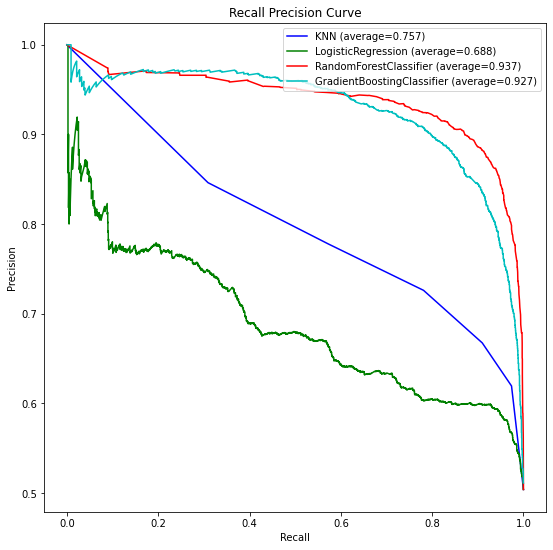

In [270]:
from sklearn.metrics import precision_recall_curve

#plot Recall-Precision Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
estimators =[pipeline_knn, pipeline_logreg, rfmodel, gbmodel ]
classifiers=['KNN', 'LogisticRegression', 'RandomForestClassifier','GradientBoostingClassifier',
           ]
colors = ['b', 'g', 'r', 'c']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test,y_pred_prob)
    average_precision= average_precision_score(y_test, y_pred_prob, average="micro")
    plt.plot(recall, precision, label='%s (average=%.3f)'%(classifiers[i],average_precision), color=colors[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
plt.title('Recall Precision Curve')